## Import packages and create classes

In [2]:
import numpy as np
import pandas as pd
import scipy.linalg
import umap
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Source: DeepProfiler, https://doi.org/10.1101/2022.08.12.503783
class WhiteningNormalizer(object):
    def __init__(self, controls, reg_param=1e-6):
        self.mu = controls.mean()
        self.whitening_transform(controls - self.mu, reg_param, rotate=True)
        print(self.mu.shape, self.W.shape)
        
    def whitening_transform(self, X, lambda_, rotate=True):
        C = (1/X.shape[0]) * np.dot(X.T, X)
        s, V = scipy.linalg.eigh(C)
        D = np.diag( 1. / np.sqrt(s + lambda_) )
        W = np.dot(V, D)
        if rotate:
            W = np.dot(W, V.T)
        self.W = W

    def normalize(self, X):
        return np.dot(X - self.mu, self.W)
    

## Import input data for cell features and cell perturbations

In [8]:
# cell x feature matrix
df_feature

# cell pertubation list
list_pert


,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,2.259156,2.041161,3.062249,0.817727,0.750279,3.511654,0.292001,0.518917,1.231793,0.929760,...,1.404231,0.617275,0.657512,1.870456,2.815256,0.522406,2.865021,2.659203,1.246957,1.038995
1,2.881174,2.206470,3.082139,0.526491,0.841177,2.602937,-0.048703,0.686910,2.162141,0.950173,...,1.215147,0.531922,-0.087638,2.104657,4.215901,0.675553,3.182888,3.018155,1.726988,1.232619
2,2.023231,2.374300,2.502774,1.107049,0.845158,3.114063,0.138213,0.366876,1.068805,0.978051,...,1.574739,0.652919,0.117696,1.545772,3.391231,0.406272,3.259578,1.990376,1.496826,1.122846
3,2.683852,2.007921,2.981459,1.637838,1.158192,1.898755,0.670707,0.646216,1.430524,0.817152,...,1.165787,0.576792,0.519749,1.890538,2.811608,0.520678,3.087989,2.752306,1.211427,0.986615
4,2.117838,2.262102,3.090129,1.002666,0.888851,2.001343,0.031869,0.218009,1.477513,0.886216,...,1.268749,0.445462,0.228131,2.258243,2.838463,0.662013,3.050731,3.225227,2.286801,1.127764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52416,2.428775,2.314811,2.783908,1.076523,0.966517,2.938656,0.291863,0.845364,1.427934,0.834831,...,1.551555,0.506102,0.122214,1.765738,3.895683,0.371779,3.154522,3.581807,1.770972,1.580297
52417,2.697815,2.061047,3.083426,1.005215,0.968462,3.224623,0.321748,0.391095,1.298858,0.908779,...,1.332078,0.441261,-0.104527,1.763246,3.411234,0.513904,3.420837,3.242836,2.265052,1.090183
52418,1.710782,1.969252,2.558189,1.072500,1.094183,0.838850,-0.103576,0.754933,1.406231,0.760554,...,1.275065,0.316609,-0.091255,1.899610,2.852134,0.680021,3.140243,1.582662,1.665241,1.719728
52419,2.167715,1.859276,2.724419,1.020968,0.845858,2.889310,0.599527,0.364502,1.240875,0.683185,...,1.654942,0.613268,0.153541,1.953670,3.938573,0.414148,3.017822,2.997387,1.657744,1.117191


## Plot UMAP before sphering transform

In [9]:
reducer = umap.UMAP()
umap_feature = reducer.fit_transform(df_feature.values)
umap_feature.shape


(52421, 2)

In [10]:
df_umap_original = pd.DataFrame(data = umap_feature, columns = ['x', 'y'])

# assign 1 to cells from control condition and 0 for all other conditions/perturbations
map_pertControl = dict(zip(list(set(list_pert)), [1 if x == 'control' else 0 for x in list(set(list_pert))]))
list_control = np.array([map_pertControl[x] for x in list_pert])
df_umap_original['control'] = list_control

df_umap_original


,x,y,control
0,5.444352,0.373564,1
1,3.839548,0.303057,1
2,5.505799,-1.717330,1
3,4.514002,1.447628,1
4,1.909434,2.802661,1
...,...,...,...
52416,7.101375,-2.066396,0
52417,4.154837,1.444661,0
52418,1.404001,1.470963,0
52419,7.039943,-1.011983,0


[Text(0.5, 0, 'umap_1'), Text(0, 0.5, 'umap_2')]

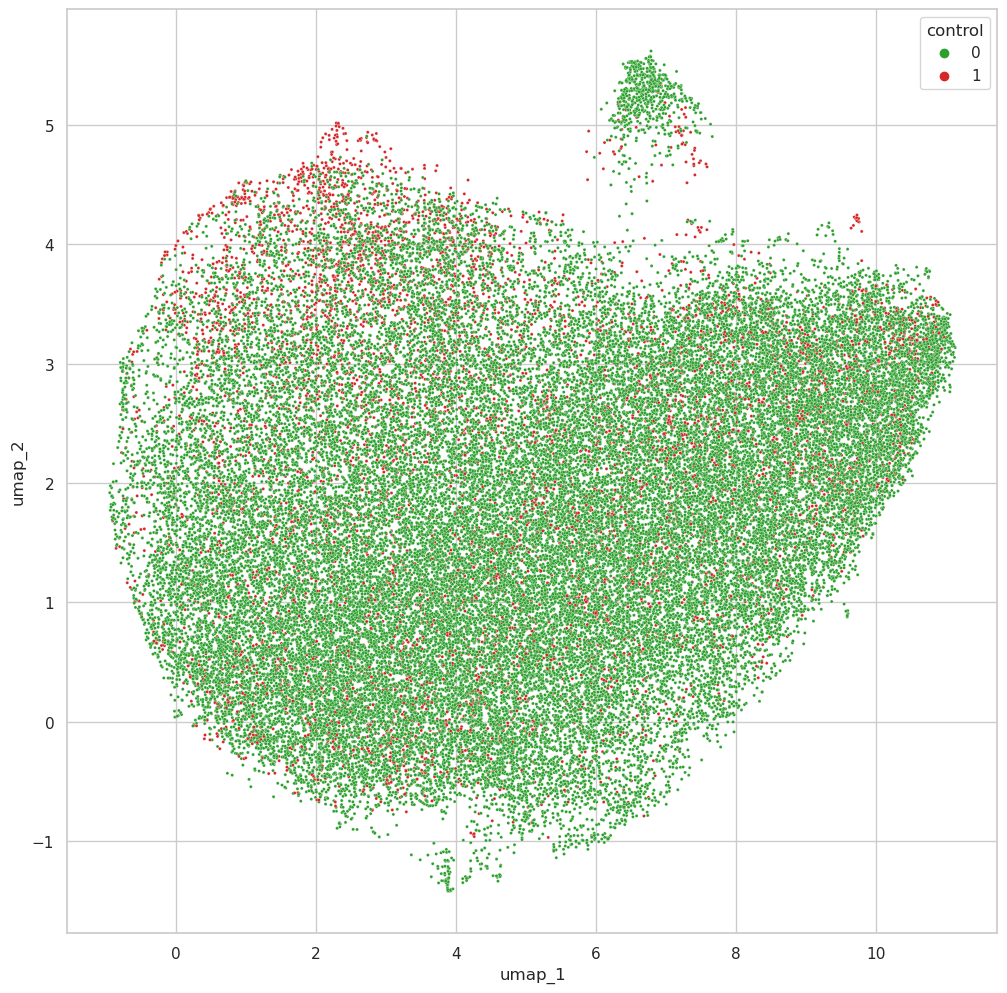

In [50]:
sns.set(rc={'figure.figsize':(12,12)}, style='whitegrid')
color_palette = sns.color_palette("tab10")
color_control = {0: color_palette[2], 1: color_palette[3]}

ax = sns.scatterplot(x="x", 
                     y="y", 
                     data=df_umap_original, 
                     hue="control", 
                     s=5,
                     palette=color_control
                    )

ax.set(xlabel='umap_1', 
       ylabel='umap_2'
      )


## Create matrix with control cells

In [17]:
# get index of cells from control condition
idx_control = [i for i,j in enumerate(list_pert) if j == 'control']
len(idx_control)


7098

In [18]:
# filter original matrix to create matrix with control cells
df_control = df_feature[df_feature.index.isin(idx_control)]
df_control


,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,2.259156,2.041161,3.062249,0.817727,0.750279,3.511654,0.292001,0.518917,1.231793,0.929760,...,1.404231,0.617275,0.657512,1.870456,2.815256,0.522406,2.865021,2.659203,1.246957,1.038995
1,2.881174,2.206470,3.082139,0.526491,0.841177,2.602937,-0.048703,0.686910,2.162141,0.950173,...,1.215147,0.531922,-0.087638,2.104657,4.215901,0.675553,3.182888,3.018155,1.726988,1.232619
2,2.023231,2.374300,2.502774,1.107049,0.845158,3.114063,0.138213,0.366876,1.068805,0.978051,...,1.574739,0.652919,0.117696,1.545772,3.391231,0.406272,3.259578,1.990376,1.496826,1.122846
3,2.683852,2.007921,2.981459,1.637838,1.158192,1.898755,0.670707,0.646216,1.430524,0.817152,...,1.165787,0.576792,0.519749,1.890538,2.811608,0.520678,3.087989,2.752306,1.211427,0.986615
4,2.117838,2.262102,3.090129,1.002666,0.888851,2.001343,0.031869,0.218009,1.477513,0.886216,...,1.268749,0.445462,0.228131,2.258243,2.838463,0.662013,3.050731,3.225227,2.286801,1.127764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27008,1.884809,2.093182,1.792767,0.986213,0.937441,3.842463,0.215541,0.303446,1.302482,0.895398,...,1.353492,0.458949,0.084711,1.430428,4.307676,0.346068,3.030996,2.315708,1.667553,1.306094
27009,1.677356,2.337866,2.003000,1.605630,1.006897,2.125334,0.048984,0.361285,1.241790,1.021260,...,1.405620,0.394030,0.050674,1.156894,3.177768,0.561476,3.061208,2.838903,1.555040,1.544845
27010,0.992409,2.553542,2.510249,1.098638,0.736799,1.440909,0.011988,0.302895,1.266846,0.743519,...,1.173484,0.566570,0.025068,1.395694,2.969181,0.617941,2.808244,1.893095,1.033186,1.311359
27011,1.931117,2.337240,2.496340,0.997821,0.746040,1.744630,-0.083104,0.700305,1.075621,1.055337,...,1.549864,0.372731,0.273169,1.614687,2.656506,0.603267,2.918108,2.476484,1.062539,1.308790


## Apply sphering transform

In [28]:
# modify regularization parameter to adjust strength of transform
param_reg = 0

# create sphering transform from the control cells
whN = WhiteningNormalizer(df_control, param_reg)


(672,) (672, 672)


In [29]:
# apply sphering transform to every cell
matrix_feature_sphere = whN.normalize(df_feature)


In [30]:
df_feature_sphere = pd.DataFrame(matrix_feature_sphere)
df_feature_sphere


,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,-0.523266,-0.810090,0.410941,-1.096351,-0.387225,-0.000078,0.079683,-0.122922,-0.377860,0.097246,...,-0.387900,1.119639,2.248854,0.149928,-0.519397,0.082020,-1.981959,-0.739614,-0.851777,-1.506010
1,1.290707,0.454284,1.159706,-1.674140,0.028511,0.027717,-0.417414,-0.347138,2.802447,0.357445,...,-1.452737,0.056728,-1.135656,1.053629,2.020506,-0.023022,0.251978,1.047095,0.215866,-0.642280
2,-1.363163,0.083195,-0.143727,0.013687,-0.635460,1.087538,0.277673,-0.486245,-0.084172,0.451459,...,0.134716,0.546819,0.152095,0.842102,0.786229,-0.673823,0.797010,-1.078416,0.250833,0.052568
3,0.151670,0.028188,0.610321,0.163526,-0.100265,-1.832321,0.948609,0.752678,0.628180,-0.002590,...,-1.418133,-0.526398,0.775149,-0.170453,0.362638,0.421952,-0.333047,-0.304945,-1.202888,-0.223350
4,-0.913560,0.374281,-0.036195,1.749896,-0.836781,-0.803182,-0.233055,0.237782,-0.161063,0.064074,...,0.329522,-0.429252,-0.221490,1.997831,-0.839099,0.303794,-0.073564,2.064306,1.117944,-0.019468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50607,1.403305,0.160936,2.014525,-0.773946,-0.686395,-1.085155,-0.901696,3.497068,0.496159,-0.602558,...,-1.198037,-0.417486,0.019638,0.309638,1.145484,-0.371264,0.550871,0.534755,-0.376504,0.729662
50608,-0.421767,1.256601,0.489441,-0.239082,0.039503,0.434776,0.603036,-0.013749,-0.988478,0.646479,...,-0.524742,-0.868829,0.364066,-1.651418,-1.479362,-0.052282,0.952083,0.404986,0.631495,-1.604945
50609,-0.869972,-1.893116,-0.698958,0.317860,0.159685,0.087780,-1.488163,1.493087,0.510125,-0.959403,...,-1.965914,0.121827,-1.746669,0.233872,-0.835355,-0.312638,-0.956811,-1.633923,-0.331751,1.922498
50610,-0.515424,-1.006106,0.274724,-0.758199,-1.297377,-1.104788,2.431522,0.732829,-0.586371,-1.845382,...,1.007786,-0.216196,-1.311394,-0.047904,-0.401008,-0.977211,-2.065596,-0.631719,-0.150961,-1.207634


In [31]:
reducer = umap.UMAP()
umap_feature_sphere = reducer.fit_transform(df_feature_sphere.values)
umap_feature_sphere.shape


(50612, 2)

In [36]:
df_umap_sphere = pd.DataFrame(data = umap_feature_sphere, columns = ['x', 'y'])

map_pertControl = dict(zip(list(set(list_pert)), [1 if x == 'control' else 0 for x in list(set(list_pert))]))
list_control = np.array([map_pertControl[x] for x in list_pert])
df_umap_sphere['control'] = list_control

# randomize rows to create plot that better represents every condition
df_umap_sphere = df_umap_sphere.sample(frac=1).reset_index(drop=True)
df_umap_sphere


,x,y,control
0,2.940827,-0.346058,0
1,3.327225,2.108880,0
2,2.921377,-0.172498,0
3,2.011752,2.839668,0
4,1.082301,-2.515999,0
...,...,...,...
50607,1.363173,2.368356,0
50608,5.855151,1.945434,0
50609,4.781481,1.458815,1
50610,2.300620,1.224736,0


[Text(0.5, 0, 'umap_1'), Text(0, 0.5, 'umap_2')]

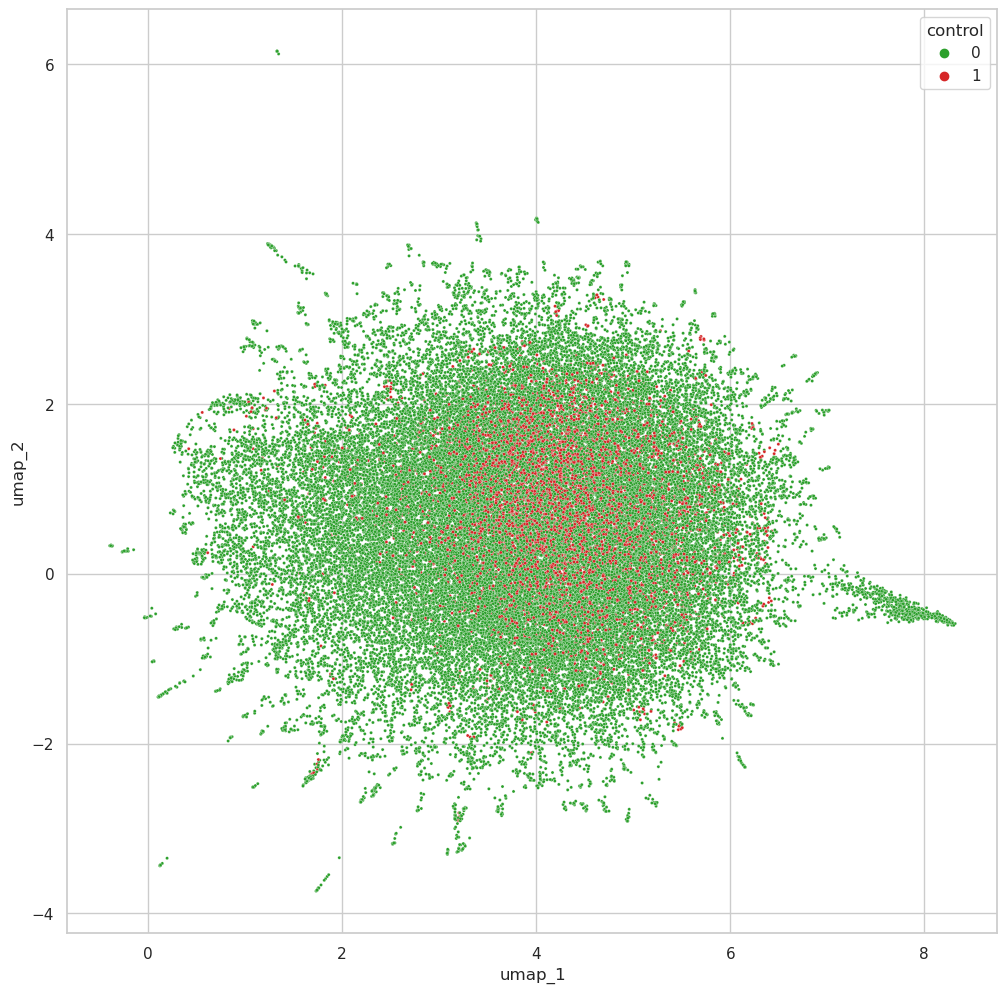

In [33]:
sns.set(rc={'figure.figsize':(12,12)}, style='whitegrid')
color_palette = sns.color_palette("tab10")
color_control = {0: color_palette[2], 1: color_palette[3]}

ax = sns.scatterplot(x="x", 
                     y="y", 
                     data=df_umap_sphere, 
                     hue="control", 
                     s=5,
                     palette=color_control
                    )

ax.set(xlabel='umap_1', 
       ylabel='umap_2'
      )
